<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CUxx_Nombre del caso de uso</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>09.2.- Data Cleansing - Missing</font>

<font color='steelblue'>Data Cleaning refers to identifying and correcting (or removing) errors in the dataset that may negatively impact a predictive model, replacing, modifying, or deleting the dirty or coarse data.</font>

## <font color='steelblue'>Tasks</font>

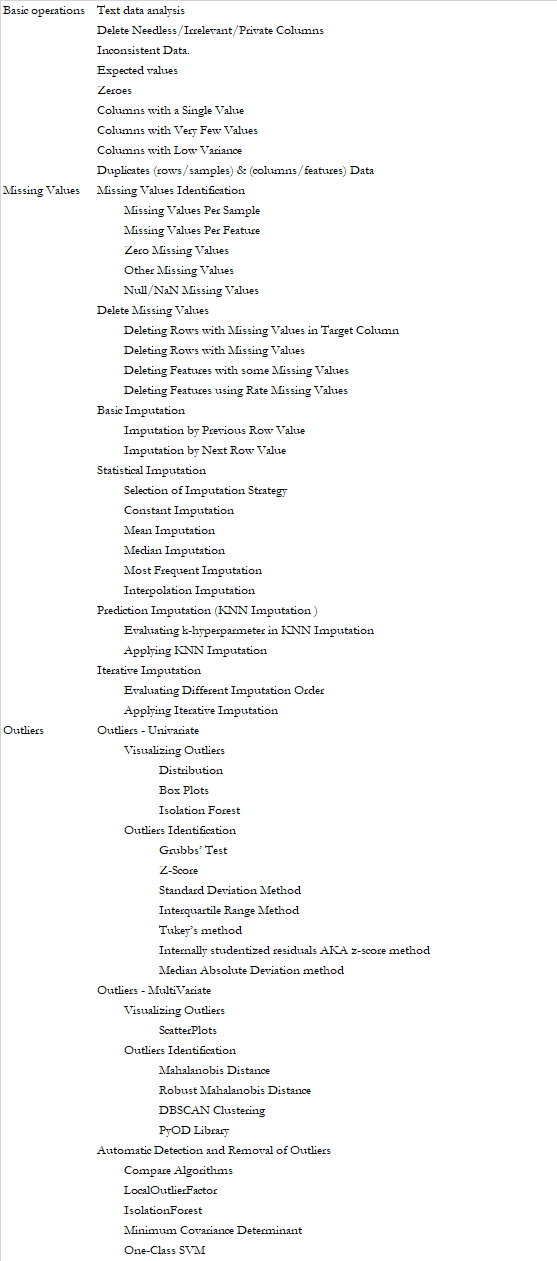


## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: xxxxxxxxxx</font>
- <font color='steelblue'> <b>Output File: xxxxxxxxxx</font>

## <font color='green'>Settings</font>

In [1]:
# Libraries to use
import os
from pathlib import Path
import pandas as pd
import easygui as GUI
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [2]:
# Data load using "easygui" library
file_data=GUI.fileopenbox(title='Open Data File', default="Data/Input/", filetypes="*.*")

<font color='tomato'>Utilizamos en todos los notebooks SIEMPRE <b>data</b> como nombre de la matriz (dataframe) principal donde cargamos los datos.</font>

In [2]:
# Data file to dataframe
data = pd.read_csv(file_data)

NameError: name 'pd' is not defined

In [3]:
data.head()

NameError: name 'data' is not defined

<font color='tomato'><b> OPCION B:</b> Directamente</font>

In [2]:
file_name='diabetes.csv'
data = pd.read_csv('Data/Input/'+file_name)

<font color='tomato'>Visualizo los datos.</font>

In [1]:
data

NameError: name 'data' is not defined

## Missing Values

### Missing Values Identification

#### Missing Values Per Sample

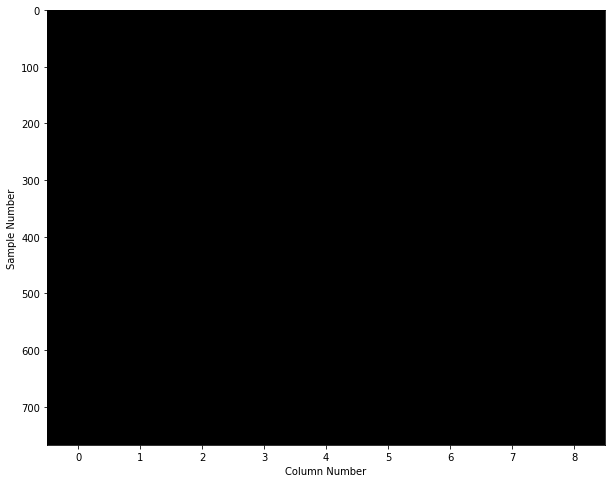

In [3]:
plt.figure(figsize=(10, 8))
plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

#### Missing Values Per Feature

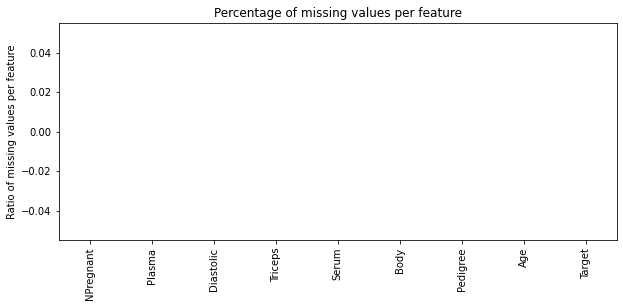

In [5]:
data.isna().mean().sort_values().plot(
    kind="bar", figsize=(10, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

#### Zero Missing Values

In [80]:
# Detecting columns with minimum value of zero (0).
print(data.describe())

        NPregnant      Plasma   Diastolic     Triceps       Serum        Body  \
count  657.000000  763.000000  733.000000  541.000000  394.000000  757.000000   
mean     4.494673  121.686763   72.405184   29.153420  155.548223   32.457464   
std      3.217291   30.535641   12.382158   10.476982  118.775855    6.924988   
min      1.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      2.000000   99.000000   64.000000   22.000000   76.250000   27.500000   
50%      4.000000  117.000000   72.000000   29.000000  125.000000   32.300000   
75%      7.000000  141.000000   80.000000   36.000000  190.000000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              Age  Target  
count  768.000000   268.0  
mean    33.240885     1.0  
std     11.760232     0.0  
min     21.000000     1.0  
25%     24.000000     1.0  
50%     29.000000     1.0  
75%     41.000000     1.0  
max     81.000000     1.0  


In [86]:
# Frecuency of values by comlumn
data.apply(pd.value_counts)

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Age,Target
1.0,135.0,NaN,NaN,NaN,NaN,NaN,NaN,268.0
2.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
579.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
600.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
680.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
744.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


<font color='tomato'>Select column to replace</font>

In [123]:
# Select column to replace
column='Age'

<font color='darkgrey'><b>Operation</font>

In [124]:
# Replace zero missing values by nan
from numpy import nan
data[column]=data[column].replace(0, nan)

In [101]:
data

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Age,Target
0,6.0,148.0,72.0,35.0,0.0,33.6,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,31,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,33,1.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,63,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,27,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,30,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,47,1.0


#### Other Missing Values

<font color='tomato'>Select column to replace</font>

In [123]:
# Select column to replace and missing value
column='Age'
missing_value='?'

<font color='darkgrey'><b>Operation</font>

In [104]:
# Replace other missing values by nan
from numpy import nan
data[column]=data[column].replace(missing_value, nan)

#### Null/NaN Missing Values

In [102]:
# Intuitivamente: miramos nº datos en todas las columnas
# los null no los cuenta --> debe hacer el mismo nº por columna
data.count()

NPregnant    768
Plasma       768
Diastolic    768
Triceps      768
Serum        768
Body         768
Age          768
Target       768
dtype: int64

In [103]:
# Podemos mirar directamente info donde viene
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NPregnant  768 non-null    float64
 1   Plasma     768 non-null    float64
 2   Diastolic  768 non-null    float64
 3   Triceps    768 non-null    float64
 4   Serum      768 non-null    float64
 5   Body       768 non-null    float64
 6   Age        768 non-null    int64  
 7   Target     768 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 48.1 KB


In [12]:
# Contamos los nulos de forma explícita
nulls=data.isnull().sum()
nulls

NPregnant    0
Plasma       0
Diastolic    0
Triceps      0
Serum        0
Body         0
Pedigree     0
Age          0
Target       0
dtype: int64

In [14]:
# summarize the number of rows with missing values for each column
for i in data.columns:
    # count number of rows with missing values
    n_miss = data[[i]].isnull().sum()
    perc = n_miss / data.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> NPregnant, Missing: 0 (0.0%)
> Plasma, Missing: 0 (0.0%)
> Diastolic, Missing: 0 (0.0%)
> Triceps, Missing: 0 (0.0%)
> Serum, Missing: 0 (0.0%)
> Body, Missing: 0 (0.0%)
> Pedigree, Missing: 0 (0.0%)
> Age, Missing: 0 (0.0%)
> Target, Missing: 0 (0.0%)


In [11]:
data[[1]]

KeyError: "None of [Int64Index([1], dtype='int64')] are in the [columns]"

### Delete Missing Values

#### Deleting Rows with Missing Values in Target Column

In [105]:
data.dropna(subset=[target],inplace=True)

#### Deleting Rows with Missing Values
Only in case of high data size

In [13]:
# Eliminamos las filas con valores nulos
data.dropna()

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Deleting Features with some Missing Values
Only with many features and for non-relevant features

In [14]:
# Selecciono las columnas con algún valor missing:
Columns_with_na_dropped = data.dropna(axis=1)
#Saco la cabecera para ver las columnas que han quedado:
Columns_with_na_dropped.head()

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Deleting Features using Rate Missing Values

In [111]:
# Number of data
dc=data.count()
dc

NPregnant    768
Plasma       768
Diastolic    768
Triceps      768
Serum        768
Body         768
Age          768
Target       768
dtype: int64

In [114]:
# Number of missing data
dn=data.isnull().sum()
dn

NPregnant    0
Plasma       0
Diastolic    0
Triceps      0
Serum        0
Body         0
Age          0
Target       0
dtype: int64

In [117]:
# Rate (%) of missing data 
(dn*100)/dc

NPregnant    0.0
Plasma       0.0
Diastolic    0.0
Triceps      0.0
Serum        0.0
Body         0.0
Age          0.0
Target       0.0
dtype: float64

In [118]:
data

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Age,Target
0,6.0,148.0,72.0,35.0,0.0,33.6,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,31,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,33,1.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,63,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,27,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,30,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,47,1.0


<font color='tomato'>Select column to delete</font>

In [123]:
# Select column to delete
column='Age'

<font color='darkgrey'><b>Operation</font>

In [120]:
# Deleting Features selected
data.drop(column, axis=1)

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Target
0,6.0,148.0,72.0,35.0,0.0,33.6,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.0
...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,1.0


### Basic Imputation

#### Imputation by Previous Row Value

In [18]:
# Sustituimos valores null por otro valor: VALOR FILA ANTERIOR
data.fillna(method='pad', limit=1)

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Imputation by Next Row Value

In [19]:
# Sustituimos valores null por otro valor: VALOR FILA SIGUIENTE
data.fillna(method='bfill', limit=1)

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Statistical Imputation

A popular approach for data imputation is to calculate a statistical value for each column (such as a mean) and replace all missing values for that column with the 
statistic.

#### Selection of Imputation Strategy

In [60]:
# The mean accuracy of each approach can then be compared.
#
# Specific results may vary given the stochastic nature of 
# the learning algorithm, the evaluation procedure, or 
# differences in numerical precision. Consider running the 
# example a few times and compare the average performance.
#
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# Convert dataframe to numpy
data_numpy = data.values
# split into input and output elements
ix = [i for i in range(data_numpy.shape[1]) if i != target_index]
X, y = data_numpy[:, ix], data_numpy[:, target_index]
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m',
        RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))


>mean 0.758 (0.047)
>median 0.751 (0.048)
>most_frequent 0.753 (0.045)
>constant 0.757 (0.045)


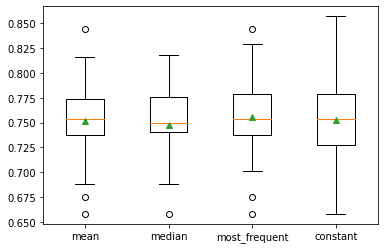

In [58]:
# Plot model performance for comparison
# box and whisker plot is created for each set of results, 
# allowing the distribution of results to be compared.
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

#### Constant Imputation

<font color='tomato'>Select constant value</font>

In [122]:
# Select constant value
c=0

<font color='darkgrey'><b>Operation</font>

In [15]:
# Constant imputation
data.fillna(c)

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Mean Imputation

In [16]:
# Sustituimos valores null por otro valor: MEDIA
# Miro la media
data.mean()

NPregnant      3.845052
Plasma       120.894531
Diastolic     69.105469
Triceps       20.536458
Serum         79.799479
Body          31.992578
Pedigree       0.471876
Age           33.240885
Target         0.348958
dtype: float64

In [72]:
# Sustituyo
data.fillna(data.mean())

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Age,Target
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,0,36.8,27,0
765,5,121,72,23,112,26.2,30,0
766,1,126,60,0,0,30.1,47,1


#### Median Imputation

In [73]:
# Sustituimos valores null por otro valor: MEDIA
# Miro la media
data.median()

NPregnant      3.0
Plasma       117.0
Diastolic     72.0
Triceps       23.0
Serum         30.5
Body          32.0
Age           29.0
Target         0.0
dtype: float64

In [72]:
# Sustituyo
data.fillna(data.median())

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Age,Target
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,0,36.8,27,0
765,5,121,72,23,112,26.2,30,0
766,1,126,60,0,0,30.1,47,1


#### Most Frequent Imputation

In [75]:
mf=pd.DataFrame(data.value_counts().idxmax())
mf


,0
0,17.0
1,163.0
2,72.0
3,41.0
4,114.0
5,40.9
6,47.0
7,1.0


In [76]:
# Sustituyo
data.fillna(mf)

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Age,Target
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,0,36.8,27,0
765,5,121,72,23,112,26.2,30,0
766,1,126,60,0,0,30.1,47,1


#### Interpolation Imputation

In [20]:
# Sustituimos valores null por otro valor: INTERPOLANDO
# Métodos de interpolación
# ‘linear’, ‘time’, ‘index’, ‘values’, ‘nearest’, ‘zero’, ‘slinear’, 
# ‘quadratic’, ‘cubic’, ‘barycentric’, ‘krogh’, ‘polynomial’, ‘spline’ 
# ‘piecewise_polynomial’, ‘pchip’
data.interpolate(method='linear')

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Prediction Imputation (KNN Imputation )
An approach to missing data imputation is to use a model to predict the missing values.

#### Evaluating k-hyperparmeter in KNN Imputation

<font color='tomato'>Select numbers of neighbors to evaluate</font>

In [66]:
# Numbers of neighbors to evaluate
n_ns=[1,3,5,7,9,15,18,21]

<font color='darkgrey'><b>Operation</font>

>1 0.764 (0.043)
>3 0.754 (0.046)
>5 0.757 (0.039)
>7 0.762 (0.047)
>9 0.759 (0.045)
>15 0.763 (0.044)
>18 0.763 (0.043)
>21 0.762 (0.047)


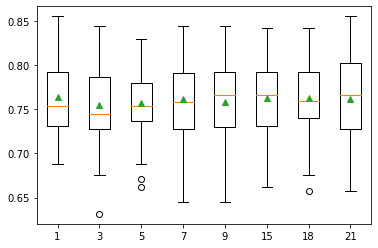

In [67]:
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
data_numpy = data.values
ix = [i for i in range(data_numpy.shape[1]) if i != target_index]
X, y = data_numpy[:, ix], data_numpy[:, target_index]
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in n_ns]
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m',
    RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

#### Applying KNN Imputation 

In [15]:
data

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<font color='tomato'>Select numbers of neighbors to evaluate</font>

In [122]:
# Number of neighbors
n_n=5

<font color='darkgrey'><b>Operation</font>

In [28]:
ix = [i for i in data.columns if i != target]
X = data[ix]
y = data[[target]]

In [61]:
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer(n_neighbors=n_n)
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)

In [58]:
# Generating de new Data dataframe
X=pd.DataFrame(Xtrans)
X.columns=ix
data=pd.concat([X,y], axis=1)
data

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


### Iterative Imputation 

#### Evaluating Different Imputation Order
We can experiment with different imputation order strategies, such as descending, right-to-left (Arabic), left-to-right (Roman), and random.

>ascending 0.766 (0.045)
>descending 0.763 (0.039)
>roman 0.760 (0.044)
>arabic 0.763 (0.047)
>random 0.763 (0.043)


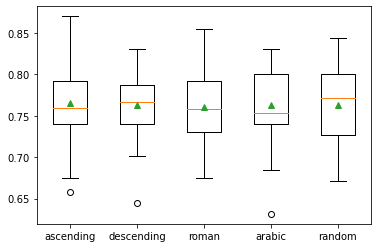

In [10]:
# compare iterative imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# split into input and output elements
data_numpy= data.values
ix = [i for i in range(data_numpy.shape[1]) if i != target_index]
X, y = data_numpy[:, ix], data_numpy[:, target_index]
# evaluate each strategy on the dataset
results = list()
strategies = ['ascending', 'descending', 'roman', 'arabic', 'random']
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', IterativeImputer(imputation_order=s)), ('m',
    RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

#### Applying Iterative Imputation

<font color='tomato'>Select strategie</font>

In [11]:
# Selecting strategie
# strategies = ['ascending', 'descending', 'roman', 'arabic', 'random']
strat='roman'

<font color='darkgrey'><b>Operation</font>

In [12]:
ix = [i for i in data.columns if i != target]
X = data[ix]
y = data[[target]]

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# define imputer
imputer = IterativeImputer(imputation_order=strat)
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)

In [2]:
# Generating the new Data dataframe
X=pd.DataFrame(Xtrans)
X.columns=ix
data=pd.concat([X,y], axis=1)
data

NameError: name 'pd' is not defined

## <font color='green'>Data Save</font>

<font color='tomato'> Identificamos los datos a guardar</font>

In [7]:
data_to_save = data

<font color='tomato'>Extensión añadida al nombre del fichero: será el número del proceso que lo genera (e.g. diabetes_06).</font>

<font color='tomato'>En caso de generarse varios ficheros llevarán _01 _02 ... después (e.g. diabetes_06_01).</font>

In [8]:
# Proceso 09_2
extension='_09_2'

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [11]:
# Guardamos el fichero
file_save=basename(file_data).replace('.csv',extension+'.csv')
path_save="Data/Output/"+file_save
path_out=GUI.filesavebox(title='Save Data File',default=path_save)
data_to_save.to_csv(path_out, index=False)
print('Falie saved as:')
path_out

Falie saved as:


<font color='tomato'><b> OPCION B:</b> Uso del código que va a Pilot Deploy</font>

In [10]:
file_save=basename(file_name).replace('.csv',extension+'.csv')
data_to_save.to_csv('Data/Output/' + file_save, index=False)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

Ejemplos
- Se han modificado los nombres de las columnas
- Se han eliminado blancos en los nombres de las columnas
- Se han traducido los nombres de las columnas

## <font color=' #2874a6 '>Main Conclusions</font>

Ejemplos
- Los nombre de las columnas de origen son muy largos lo que provoca que ...
- ......

## <font color='RED'>CODE TO DEPLOY</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- xxxxxx
- xxxxxx
- xxxxxx

<font color=' red '><b>CODE</b></font>

In [1]:
# 
